# French bakery daily sales

**About Dataset**


The dataset belongs to a French bakery. The dataset provides the daily transaction details of customers from 2021-01-01 to 2022-09-30.
Yearly and weekly saisonalities can be observed.


**Content**

The dataset has 234005 entries, over 136000 transactions and 6 columns.
Variables

***date:*** date order

***time:*** time order

***ticket number:*** identifier for every single transaction

***article:*** name of the product sold (in French)

***quantity:*** quantity sold

***unit_price:*** price per product


**Objective:** Forecast the sales in order to ease the production planning

Source: https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales

![image](https://www.parisperfect.com/blog/wp-content/uploads/2017/04/dcp-201510024486-1024x645.jpg)

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
sns.set_theme()

Read in the Bakery sales.csv file as a DataFrame called df.

In [3]:
df = pd.read_csv('Bakery sales.csv')

Check the head of DataFrame, and check out its info() and describe() methods.

In [4]:
df.head(5)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [6]:
df.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


We can get rid of columns <code>Unnamed: 0</code>, <code>ticket_number</code>, which are not important for further analysis.

In [7]:
df = df.drop(['Unnamed: 0','ticket_number'],axis=1)

Let's make the column <code>unit_price</code> favorable for processing and analysis: remove the euro sign, replace the comma with a dot and convert it to a <code>float</code> data type

In [8]:
df['unit_price'] = df['unit_price'].replace('[\€ ]', '', regex=True)
df['unit_price'] = df['unit_price'].replace('[,]', '.', regex=True).astype(float)

In our case, it is advisable to calculate the total amount of income <code>total_price</code>, to group by each unit of the product<code>article</code>. Then the column <code>unit_price</code> has no value for further analysis and we can get rid of it.

In [9]:
df['total_price'] = df['Quantity'] * df['unit_price']

In [10]:
df = df.drop('unit_price',axis=1)

In [11]:
article_grouped=df.groupby(['article']).sum(numeric_only=True)


In [12]:
article_grouped = article_grouped.drop(article_grouped.index[0])
article_grouped.head(10)

,Quantity,total_price
article,,
12 MACARON,70.0,700.00
ARMORICAIN,3.0,7.50
ARTICLE 295,1.0,0.00
BAGUETTE,22053.0,20481.40
BAGUETTE APERO,62.0,279.00
BAGUETTE GRAINE,1862.0,2469.40
BANETTE,22732.0,24555.15
BANETTINE,3092.0,1951.30
BOISSON 33CL,1872.0,2808.00


Next, we will determine the most popular products for sale in terms of <code>Quantity</code> and <code>total_price</code>.

In [13]:
most_pop_art = article_grouped.sort_values('Quantity', axis=0, ascending=False)[:7]
most_pop_art

,Quantity,total_price
article,,
TRADITIONAL BAGUETTE,117463.0,144756.05
CROISSANT,29654.0,33579.50
PAIN AU CHOCOLAT,25236.0,31100.45
COUPE,23505.0,3525.75
BANETTE,22732.0,24555.15
BAGUETTE,22053.0,20481.40
CEREAL BAGUETTE,7427.0,9473.40


In [14]:
article_grouped.sort_values('total_price', axis=0, ascending=False)[:10]

,Quantity,total_price
article,,
TRADITIONAL BAGUETTE,117463.0,144756.05
FORMULE SANDWICH,5181.0,34710.50
CROISSANT,29654.0,33579.50
PAIN AU CHOCOLAT,25236.0,31100.45
BANETTE,22732.0,24555.15
BAGUETTE,22053.0,20481.40
SANDWICH COMPLET,2888.0,13550.00
SPECIAL BREAD,5456.0,13419.70
TRAITEUR,1456.0,12254.30


Make the <code>date</code> column more convenient for further analysis of data by months and years - <code>year-month</code> column. 

In [15]:
df["year-month"] = df['date'].str[:7]
df.head()

,date,time,article,Quantity,total_price,year-month
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,2021-01
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,3.60,2021-01
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,2.40,2021-01
3,2021-01-02,09:14,PAIN,1.0,1.15,2021-01
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,6.00,2021-01


Сreate a new dataframe <code>sales_month</code> containing data grouped by month.

In [16]:
sales_month=df.groupby(['year-month'], as_index=False).sum(numeric_only=True)
sales_month.tail(5)

,year-month,Quantity,total_price
16,2022-05,17643.0,29286.10
17,2022-06,15659.0,25286.30
18,2022-07,29192.0,46596.22
19,2022-08,33545.0,53857.65
20,2022-09,13433.0,21822.50


Now we can visualize our data.

<IPython.core.display.Javascript object>


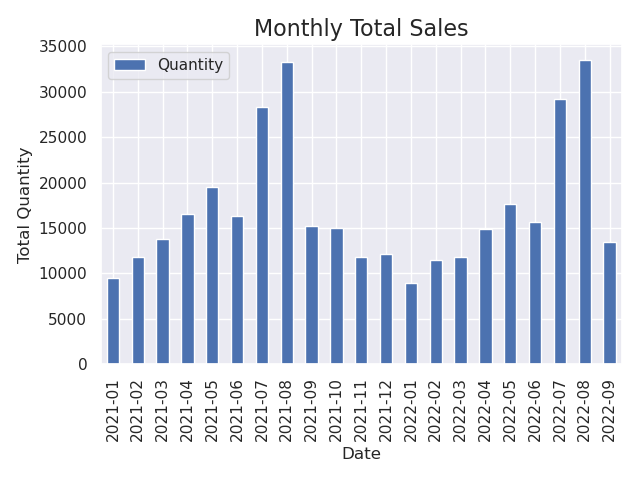

In [17]:
fig, ax = plt.subplots(1,1)
sales_month.plot.bar(x="year-month", y='Quantity', ax=ax)
plt.title('Monthly Total Sales', size = 16)
plt.xlabel('Date')
plt.ylabel('Total Quantity')
fig.tight_layout()

<IPython.core.display.Javascript object>


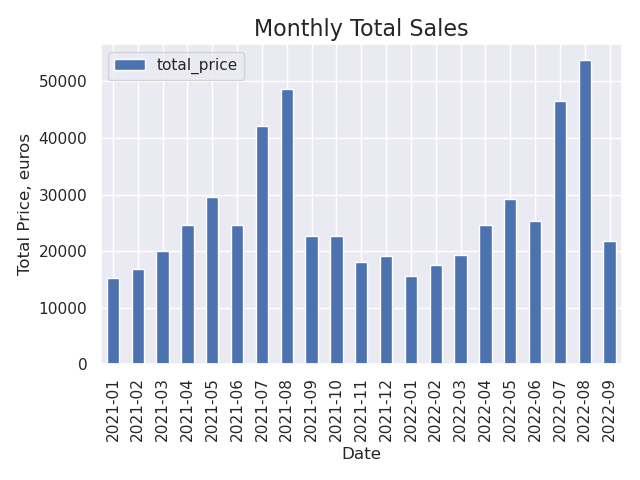

In [18]:
fig, ax = plt.subplots(1,1)
sales_month.plot.bar(x="year-month", y='total_price', ax=ax)
plt.title('Monthly Total Sales', size = 16)
plt.xlabel('Date')
plt.ylabel('Total Price, euros')
fig.tight_layout()

For better visibility, to divide the data by year. Create new dataframes <code>sales_month_2021</code> and <code>sales_month_2022</code>.

In [19]:
sales_month['month']=sales_month['year-month'].str[-2:]


In [20]:
sales_month_2021 = sales_month[:12]
sales_month_2022 = sales_month[12:]


<IPython.core.display.Javascript object>


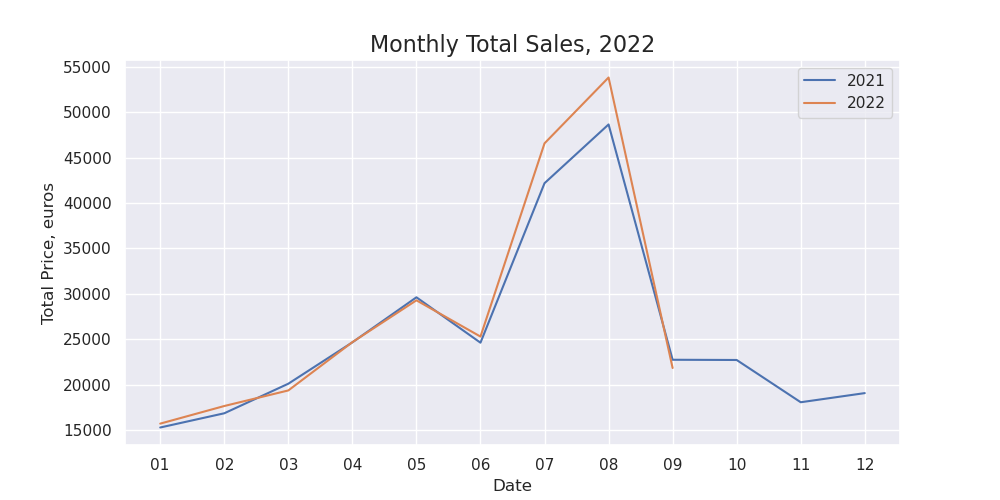

In [21]:
plt.figure(figsize=[10,5])
sns.lineplot(data = sales_month_2021, x = 'month', y = 'total_price', label='2021')
plt.title('Monthly Total Sales, 2021', size = 16)
plt.xlabel('Date')
plt.ylabel('Total Price, euros')

sns.lineplot(data = sales_month_2022, x = 'month', y = 'total_price', label='2022')
plt.title('Monthly Total Sales, 2022', size = 16)
plt.xlabel('Date')
plt.ylabel('Total Price, euros')
plt.legend()

plt.show()


Сreate graphs that show the number of the most popular sold products by month.

<IPython.core.display.Javascript object>


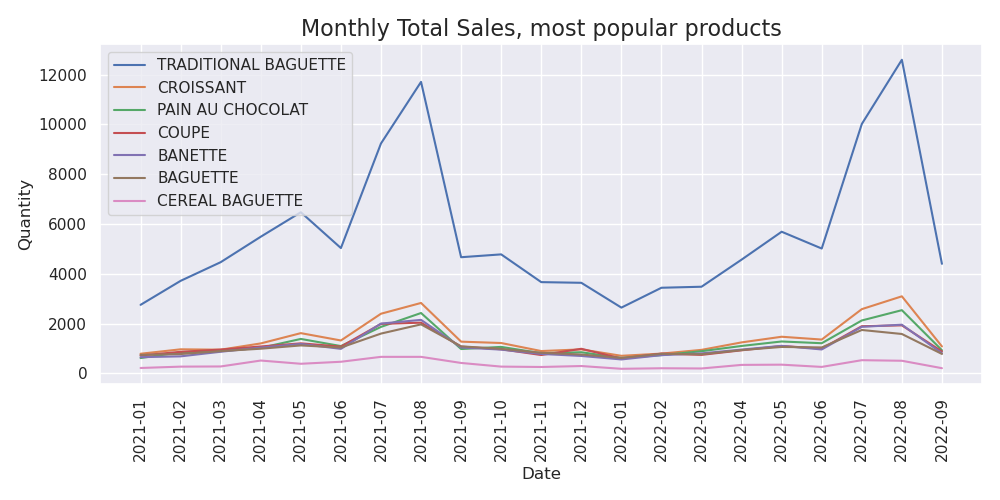

In [22]:
fig = plt.figure(figsize=[10,5])

for item in most_pop_art.index:
    item_df = df[df['article'] == item].groupby(['year-month']).sum(numeric_only=True)
    sns.lineplot(data = item_df, x = 'year-month', y = 'Quantity', label=item)

plt.title('Monthly Total Sales, most popular products', size = 16)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.show()



Сreate graphs that show the number of the most popular sold products by month (normalized plots to the sum).

<IPython.core.display.Javascript object>


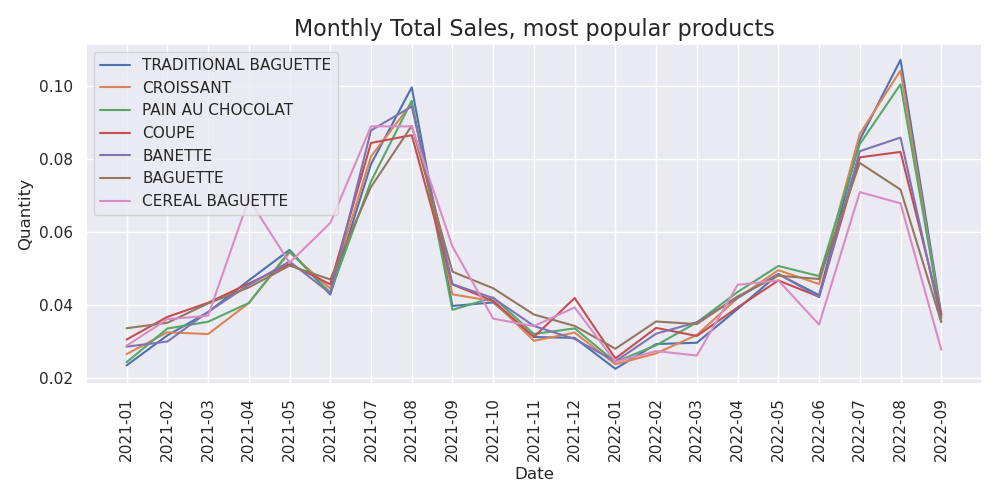

In [23]:
fig = plt.figure(figsize=[10,5])

for item in most_pop_art.index:
    item_df = df[df['article'] == item].groupby(['year-month'], as_index=False).sum(numeric_only=True)
    plt.plot(item_df['year-month'],  item_df['Quantity']/item_df['Quantity'].sum(), label=item)

plt.title('Monthly Total Sales, most popular products', size = 16)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.show()

### From the graph, it can be concluded that the function is periodic, stable and can be modeled effectively.

Our data includes almost two years of sales information. But even from such a short period of time, we can see that the graph shows a periodic dependence. We have maximum sales in July and August (probably due to the holiday season and the increase in the number of tourists).

Therefore, we can try to approximate the sales schedule of the most popular product (traditional baguette), for example, with a sine function. In this way, we will be able to forecast future sales.

<IPython.core.display.Javascript object>


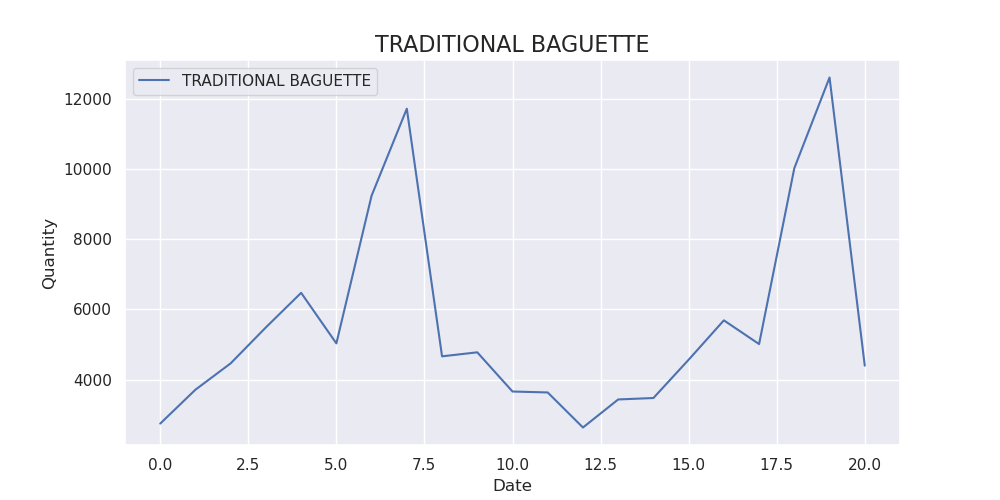

In [24]:
fig = plt.figure(figsize=[10,5])

bag_df = df[df['article'] == 'TRADITIONAL BAGUETTE'].groupby(['year-month']).sum(numeric_only=True)
plt.plot(np.arange(0, len(bag_df)), bag_df['Quantity'], label='TRADITIONAL BAGUETTE')

plt.title('TRADITIONAL BAGUETTE', size = 16)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()



For approximation, we will use the <code>scipy.optimize</code> library.

We will approximate with a sinusoidal function.

In [25]:
from scipy.optimize import curve_fit

xdata = np.arange(0, len(bag_df), dtype=float)
ydata = bag_df['Quantity'].values

def func(x, a, T, x0, y0):

    return a * np.sin(x*T-x0) ** 8 + y0

popt, pcov = curve_fit(func, xdata, ydata, p0 = [10000, 60, 7, 3800],
                       bounds=([10000, 20, 0, 0], [20000, 1000, 20, 6000])
                      )

<IPython.core.display.Javascript object>


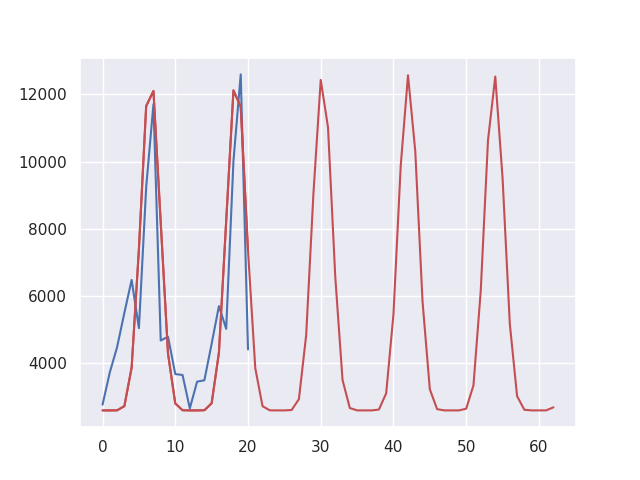

In [26]:
plt.figure()
plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-')
xdata_new = np.arange(0, 3*len(bag_df))

plt.plot(xdata_new, func(xdata_new, *popt), 'r-')

plt.show()


We can also investigate the dependence of sales on the day of the week - <code>weekday</code> column.

In [27]:
import datetime 
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.dayofweek 
df.head()

,date,time,article,Quantity,total_price,year-month,weekday
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,2021-01,5
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,3.60,2021-01,5
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,2.40,2021-01,5
3,2021-01-02,09:14,PAIN,1.0,1.15,2021-01,5
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,6.00,2021-01,5


In [28]:
sales_weekday=df.groupby(['year-month', 'weekday'], as_index=False).sum(numeric_only=True)
sales_weekday = sales_weekday.drop(['total_price'], axis=1)
sales_weekday

,year-month,weekday,Quantity
0,2021-01,0,1198.0
1,2021-01,1,1158.0
2,2021-01,3,1136.0
3,2021-01,4,1275.0
4,2021-01,5,2128.0
...,...,...,...
137,2022-09,2,1394.0
138,2022-09,3,1538.0
139,2022-09,4,2199.0
140,2022-09,5,2310.0


<IPython.core.display.Javascript object>


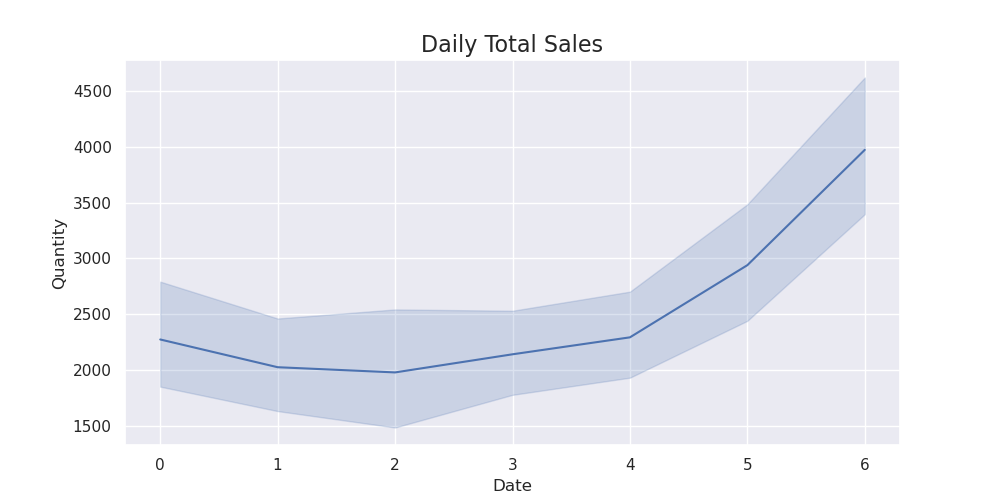

In [29]:
plt.figure(figsize=[10,5])
sns.lineplot(data = sales_weekday, x = 'weekday', y = 'Quantity')
plt.title('Daily Total Sales', size = 16)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

<IPython.core.display.Javascript object>


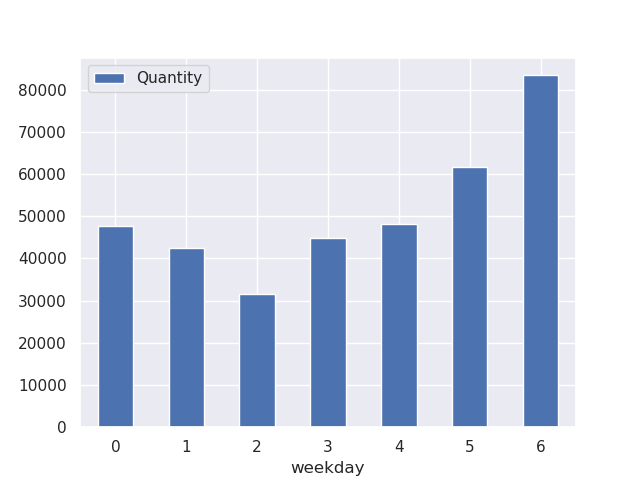

<AxesSubplot:xlabel='weekday'>

In [30]:
sales_weekday_2=df.groupby(['weekday'], as_index=False).sum(numeric_only=True)
sales_weekday_2.plot.bar(x='weekday', y='Quantity',rot=0)


It can be seen from the histogram that the closest sales correspond to such days of the week as Saturday (<code>5</code> ) and Sunday(<code>6</code>).

We can also investigate the dependence of sales on the hour of day - <code>hour</code> column.

In [31]:
df['hour'] = df['time'].str[:2].astype('int')
df.head()

,date,time,article,Quantity,total_price,year-month,weekday,hour
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,2021-01,5,8
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,3.60,2021-01,5,8
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,2.40,2021-01,5,9
3,2021-01-02,09:14,PAIN,1.0,1.15,2021-01,5,9
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,6.00,2021-01,5,9


In [32]:
sales_hour=df.groupby(['hour']).sum(numeric_only=True)
sales_hour

,Quantity,total_price,weekday
hour,,,
7,13432.0,18015.15,24022
8,50412.0,67814.45,97402
9,57445.0,80573.75,126152
10,64496.0,95120.50,150654
11,69196.0,111557.86,164567
12,52257.0,100711.15,119788
13,8752.0,17795.97,19667
14,258.0,623.90,527
15,140.0,214.60,299


<IPython.core.display.Javascript object>


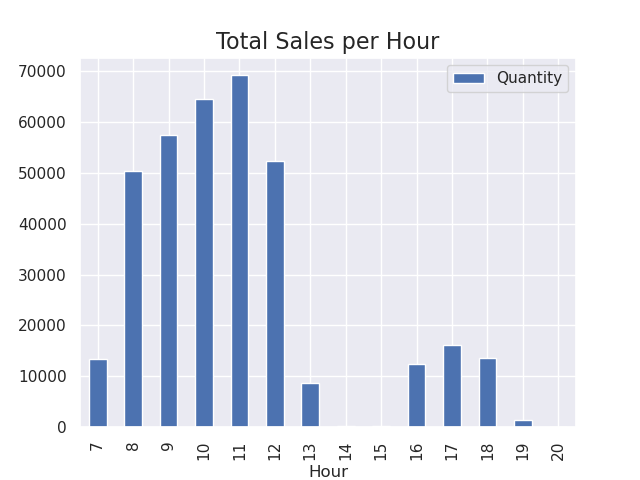

In [33]:
sales_hour.plot.bar(y='Quantity')
plt.title('Total Sales per Hour', size = 16)
plt.xlabel('Hour')
plt.legend()

This histogram shows that the largest amount of products were sold between 8 am and 12 am. Then there was probably a lunch break in the bakery. And in the evening we see slightly lower sales.

Let's consider in more detail the sales trend for the most popular product - the traditional baguette.

In [34]:
sales_hour_trad_bag=df[df['article'] == 'TRADITIONAL BAGUETTE'].groupby(['hour']).sum(numeric_only=True)
sales_hour_trad_bag

,Quantity,total_price,weekday
hour,,,
7,2553.0,3170.30,4483
8,11692.0,14496.85,21405
9,15121.0,18683.70,29583
10,22002.0,27139.15,43708
11,26550.0,32714.55,54500
12,19961.0,24519.70,40594
13,3086.0,3715.30,5922
14,53.0,63.60,83
15,71.0,87.20,116


<IPython.core.display.Javascript object>


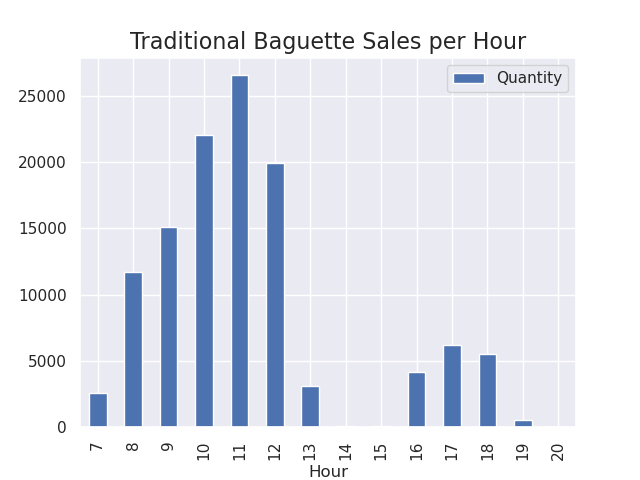

In [35]:
sales_hour_trad_bag.plot.bar(y='Quantity')
plt.title('Traditional Baguette Sales per Hour', size = 16)
plt.xlabel('Hour')
plt.legend()


Hourly sales of the most popular product, the traditional baguette, show the same behavior.

Make a comparison sales of traditional baguette on a normal day vs. before a holiday (for example, before Christmas)

In [36]:
noel_hour_trad_bag=df[(df['article'] == 'TRADITIONAL BAGUETTE') & ((df['date'] == '2021-12-24'))].groupby(['hour']).sum(numeric_only=True)
norm_hour_trad_bag=df[(df['article'] == 'TRADITIONAL BAGUETTE') & ((df['date'] == '2021-12-21'))].groupby(['hour']).sum(numeric_only=True)


<IPython.core.display.Javascript object>


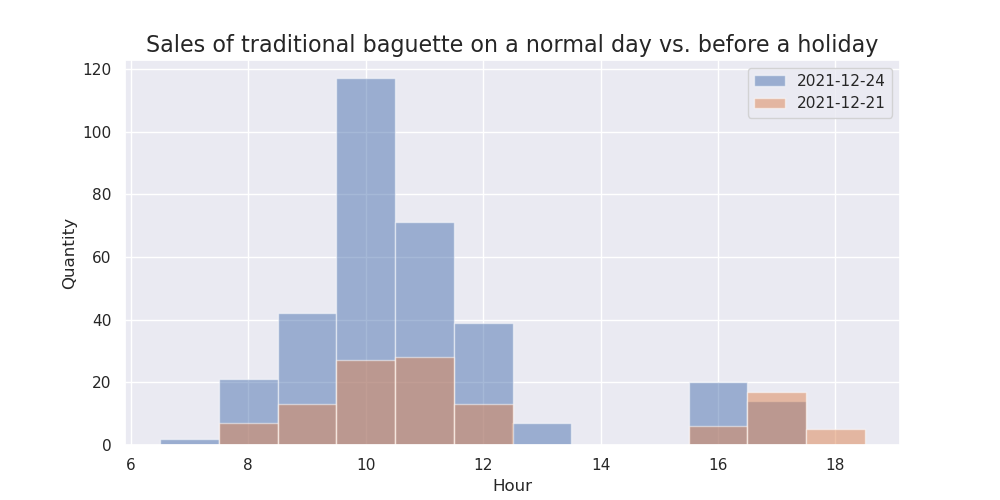

In [37]:
fig, axis = plt.subplots(1,1, figsize=(10, 5))

plt.bar(x=noel_hour_trad_bag.index, height='Quantity', width=1, align='center', data=noel_hour_trad_bag, alpha=0.5, label='2021-12-24')
plt.bar(x=norm_hour_trad_bag.index, height='Quantity', width=1, align='center', data=norm_hour_trad_bag, alpha=0.5, label='2021-12-21')

plt.title('Sales of traditional baguette on a normal day vs. before a holiday', size = 16)
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.legend()
plt.show()

Sales of a traditional baguette on the eve of the holiday are significantly higher than on a regular day. This information is useful for forecasting future sales.